# Diabetes Prediction Project

In [124]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import pickle

In [2]:
file = "health care diabetes.csv"
path = r"C:\Users\Dell\Desktop\DESKTOP FILES\CANADA\Prince\Career\SimpliLearn_IBM_Program\Capstone_project\Healthcare - Diabetes"

In [3]:
fullpath = os.path.join(path,file)
df = pd.read_csv(fullpath)

## Project Task: Week 1
## Data Exploration:


### 1. Perform descriptive analysis. Understand the variables and their corresponding values. 
On the columns below, a value of zero does not make sense and thus indicates missing value:
    * Glucose
    * BloodPressure
    * SkinThickness
    * Insulin
    * BMI


In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.shape

(768, 9)

In [6]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [7]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### 2. Visually explore these variables using histograms. Treat the missing values accordingly.
On the columns below, a value of zero does not make sense and thus indicates missing value:
* Glucose
* BloodPressure
* SkinThickness
* Insulin
* BMI

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016BBEFB5708>,
      dtype=object)

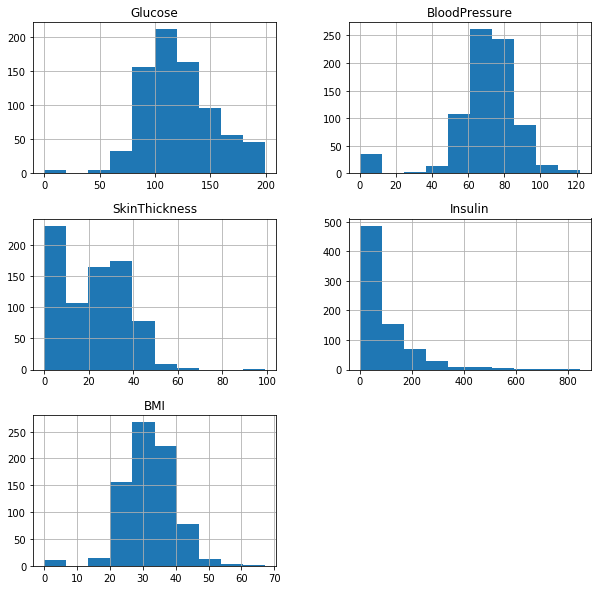

In [9]:
df[['Glucose','BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].hist(figsize=(10,10))

#### Treat Missing Values in Glucose variable

In [10]:
# Check and treat missing values in Glucose variable

df[df["Glucose"] == 0][['Glucose']].shape[0]

5

From the histogram plot of Glucose distribution;
* Aside the distribution being slightly left skewed, it is fairly normal.
* It is safe to assign the missing values with the mean of the distribution

In [11]:
print(f"Mean value: {df[df['Glucose'] != 0]['Glucose'].mean()}")
print(f"Max value: {df[df['Glucose'] != 0]['Glucose'].max()}")
print(f"Mode: {df[df['Glucose'] != 0]['Glucose'].mode()}")

Mean value: 121.6867627785059
Max value: 199
Mode: 0     99
1    100
dtype: int64


In [12]:
df[['Glucose']].describe()

,Glucose
count,768.000000
mean,120.894531
std,31.972618
min,0.000000
25%,99.000000
50%,117.000000
75%,140.250000
max,199.000000


In [13]:
# Replace missing values in the Glucose variable with mean of distribution

df['Glucose'] = df['Glucose'].map(lambda x: round(df[df['Glucose'] != 0]['Glucose'].mean(),2) if x == 0 else x)

In [14]:
# Confirm there are no more missing values

df[df["Glucose"] == 0][['Glucose']].shape[0]

0

#### Treat Missing Values in BloodPressure variable

In [15]:
# Check and treat missing values in BloodPressure variable

df[df['BloodPressure'] == 0][['BloodPressure']].shape[0] # 35 missing values

35

In [16]:
print(f"Mean value: {df['BloodPressure'].mean()}")
print(f"Max value: {df['BloodPressure'].max()}")
print(f"Mode: {df['BloodPressure'].mode()}")

Mean value: 69.10546875
Max value: 122
Mode: 0    70
dtype: int64


In [17]:
df[['BloodPressure']].describe()

,BloodPressure
count,768.000000
mean,69.105469
std,19.355807
min,0.000000
25%,62.000000
50%,72.000000
75%,80.000000
max,122.000000


Since the mode is 70 and the mean is 69, it is safe to assign the mode, 70 to the missing values.

In [18]:
df[df['BloodPressure'] == 70].shape[0]

57

In [19]:
# Replace missing values in the BloodPressure variable with mode of distribution

df['BloodPressure'] = df['BloodPressure'].map(lambda x: 70 if x == 0 else x)

In [20]:
# Confirm there are no more missing values

df[df["BloodPressure"] == 0][['BloodPressure']].shape[0]

0

#### Treat Missing Values in SkinThickness variable

In [21]:
df[df['SkinThickness'] == 0].shape[0]

227

In [22]:
# Percentage of null values: 30% not enough to drop this variable

print(f"Percentage Null: {round((df[df['SkinThickness'] == 0].shape[0] / df.shape[0]),2) * 100}%")

Percentage Null: 30.0%


From the histogram plot, the distribution if far from normal.

In [23]:
print(f"Mean value: {df[df['SkinThickness'] != 0]['SkinThickness'].mean()}")
print(f"Max value: {df[df['SkinThickness'] != 0]['SkinThickness'].max()}")
print(f"Mode: {df[df['SkinThickness'] != 0]['SkinThickness'].mode()}")

Mean value: 29.153419593345657
Max value: 99
Mode: 0    32
dtype: int64


In [24]:
df[['SkinThickness']].describe()

,SkinThickness
count,768.000000
mean,20.536458
std,15.952218
min,0.000000
25%,0.000000
50%,23.000000
75%,32.000000
max,99.000000


In [25]:
df['SkinThickness'].mean()
df[df['SkinThickness'] != 0]['SkinThickness'].mean()

29.153419593345657

In [26]:
df['SkinThickness'].value_counts().head(10)

0     227
32     31
30     27
27     23
23     22
18     20
28     20
33     20
31     19
19     18
Name: SkinThickness, dtype: int64

In [27]:
# Replace missing values in the SkinThickness variable with mean of distribution

df['SkinThickness'] = df['SkinThickness'].map(lambda x: round(df[df['SkinThickness'] != 0][ \
    'SkinThickness'].mean(),2) if x == 0 else x)

In [28]:
# Confirm there are no more missing values

df[df["SkinThickness"] == 0][['SkinThickness']].shape[0]

0

#### Treat Missing Values in Insulin variable

In [29]:
df[df['Insulin'] == 0].shape[0]

374

In [30]:
# Percentage of null values: 49% is quite high 
# but from domain knowledge, isulin level is a strong predictor of diabetes, and so would rather not drop it.

print(f"Percentage Null: {round((df[df['Insulin'] == 0].shape[0] / df.shape[0]),2) * 100}%")

Percentage Null: 49.0%


In [31]:
print(f"Mean value: {df[df['Insulin'] != 0]['Insulin'].mean()}")
print(f"Max value: {df[df['Insulin'] != 0]['Insulin'].max()}")
print(f"Mode: {df[df['Insulin'] != 0]['Insulin'].mode()}")
print(f"Median: {df[df['Insulin'] != 0]['Insulin'].median()}")

Mean value: 155.5482233502538
Max value: 846
Mode: 0    105
dtype: int64
Median: 125.0


In [32]:
df[['Insulin']].describe()

,Insulin
count,768.000000
mean,79.799479
std,115.244002
min,0.000000
25%,0.000000
50%,30.500000
75%,127.250000
max,846.000000


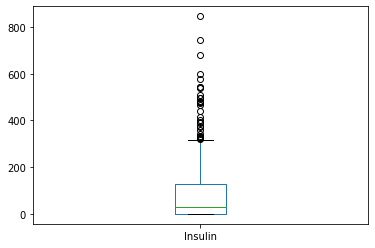

In [33]:
# There's a lot of outliers which affect the mean which is a measure of central tendency
# Going with the mean might still help with better spread compared to median or mode
df['Insulin'].plot(kind = "box")

In [34]:
# Replace missing values in the Insulin variable with mean of distribution

df['Insulin'] = df['Insulin'].map(lambda x: round(df[df['Insulin'] != 0]['Insulin'].mean(),2) if x == 0 else x)

In [35]:
# Confirm there are no more missing values

df[df["Insulin"] == 0][['Insulin']].shape[0]

0

#### Treat Missing Values in BMI variable

In [36]:
df[df['BMI'] == 0].shape[0]

11

In [37]:
# Percentage of null values: 49% is quite high 
# but from domain knowledge, isulin level is a strong predictor of diabetes, and so would rather not drop it.

print(f"Percentage Null: {round((df[df['BMI'] == 0].shape[0] / df.shape[0]),2) * 100}%")

Percentage Null: 1.0%


In [38]:
print(f"Mean value: {df[df['BMI'] != 0]['BMI'].mean()}")
print(f"Max value: {df[df['BMI'] != 0]['BMI'].max()}")
print(f"Mode: {df[df['BMI'] != 0]['BMI'].mode()}")
print(f"Median: {df[df['BMI'] != 0]['BMI'].median()}")

Mean value: 32.45746367239099
Max value: 67.1
Mode: 0    32.0
dtype: float64
Median: 32.3


In [39]:
df[['BMI']].describe()

,BMI
count,768.000000
mean,31.992578
std,7.884160
min,0.000000
25%,27.300000
50%,32.000000
75%,36.600000
max,67.100000


Mean, Median and Mode are all approximately 32. Assign 32 to the missing values

In [40]:
# Replace missing values in the BMI variable with mean of distribution

df['BMI'] = df['BMI'].map(lambda x: 32 if x == 0 else x)

In [41]:
# Confirm there are no more missing values

df[df["BMI"] == 0][['BMI']].shape[0]

0

#### Confirm there are no other missing values

In [42]:
# Confirm there are no other missing values
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### 3. There are integer and float data type variables in this dataset. Create a count (frequency) plot describing the data types and the count of variables. 

Text(0, 0.5, 'Count of variables')

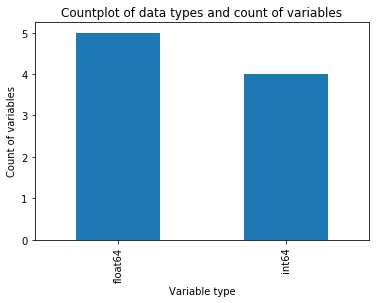

In [43]:
df.dtypes.value_counts().plot(kind="bar")
plt.title("Countplot of data types and count of variables")
plt.xlabel("Variable type")
plt.ylabel("Count of variables")

## Project Task: Week 2
## Data Exploration:


### 1. Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of action.

This may not be a case of 100% balance, but the imbalance in this case, 65% to 35%, is not considered significant enough to create serious bias in our models. It is safe to handle this as not having class imbalance.

In [44]:
print("Count by value:")
print(f"{df['Outcome'].value_counts()}\n")
print("Count by percentage:")
print(round(df['Outcome'].value_counts(normalize=True) * 100,2))

Count by value:
0    500
1    268
Name: Outcome, dtype: int64

Count by percentage:
0    65.1
1    34.9
Name: Outcome, dtype: float64


Text(0.5, 0, 'Outcome class')

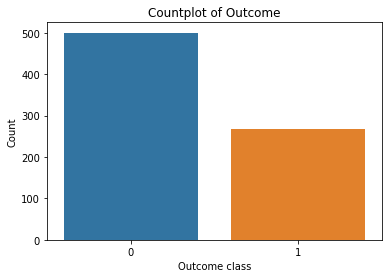

In [45]:
# Countplot of the Outcome column

sns.countplot(df['Outcome'])
plt.title("Countplot of Outcome")
plt.ylabel("Count")
plt.xlabel('Outcome class')

### 2. Create scatter charts between the pair of variables to understand the relationships. Describe your findings.

Text(0.5, 1, 'scatter plot between variables')

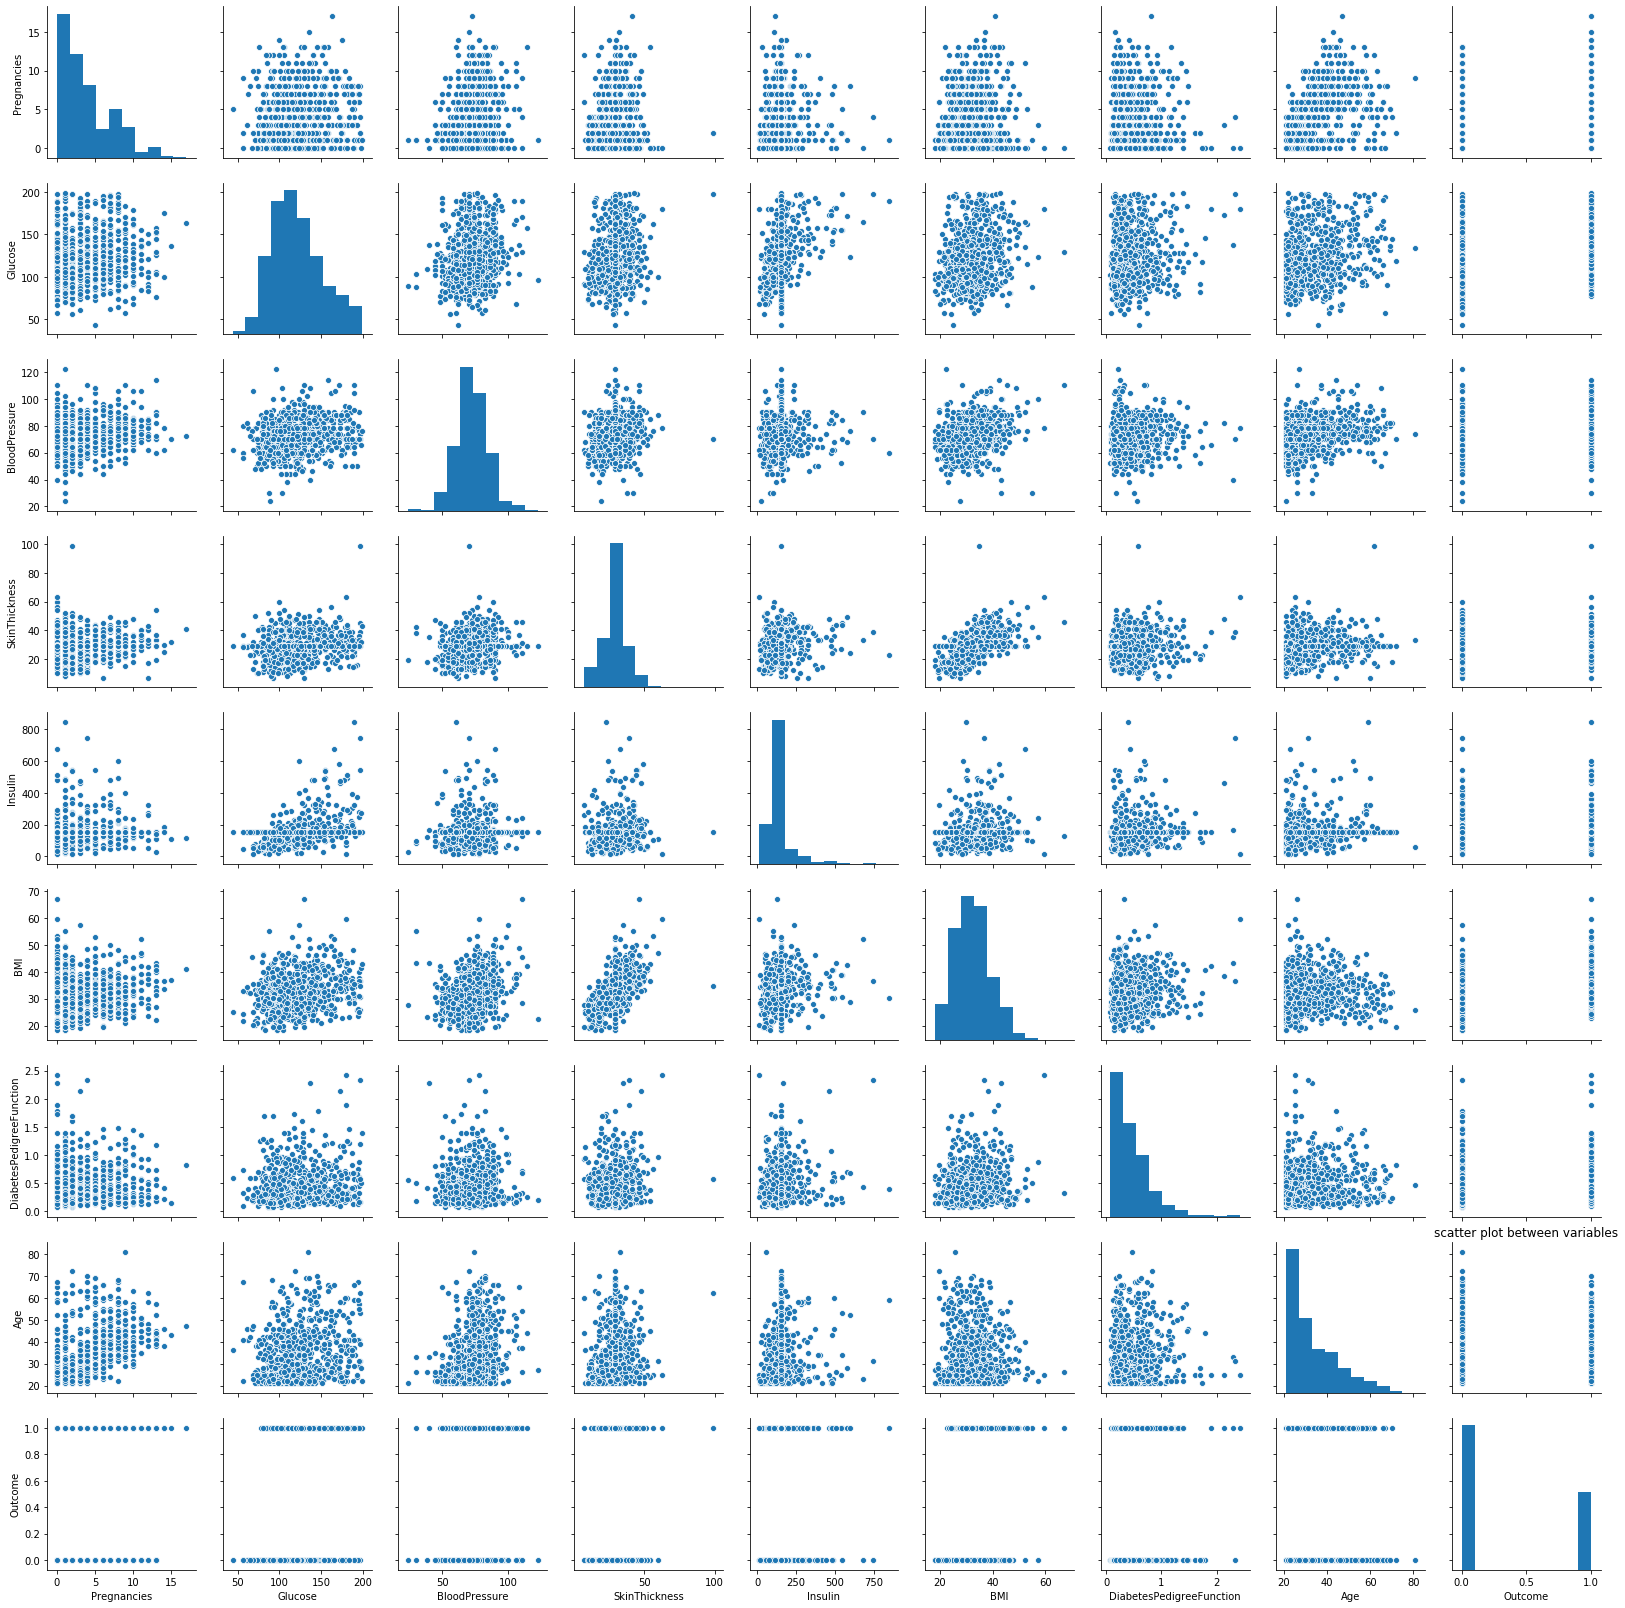

In [46]:
sns.pairplot(df)
plt.title('scatter plot between variables')

* The above is a pairplot visualizing the various relationships that exist between the varibales in the dataset. 
* There appears to be a positive correlation between Skin Thickness and MBI with some outliers.
* There is also a fair positive correlation between Blood Pressure and Age.

### 3. Perform correlation analysis. Visually explore it using a heat map.

In [47]:
#Correlation Analysis

df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127911,0.208925,0.082962,0.056029,0.021546,-0.033523,0.544341,0.221898
Glucose,0.127911,1.000000,0.219337,0.192984,0.420157,0.231480,0.137060,0.266533,0.492928
BloodPressure,0.208925,0.219337,1.000000,0.192787,0.072456,0.281276,-0.000478,0.326264,0.163875
SkinThickness,0.082962,0.192984,0.192787,1.000000,0.158139,0.542520,0.100994,0.127833,0.215290
Insulin,0.056029,0.420157,0.072456,0.158139,1.000000,0.166648,0.098632,0.136736,0.214411
BMI,0.021546,0.231480,0.281276,0.542520,0.166648,1.000000,0.153506,0.025744,0.312249
DiabetesPedigreeFunction,-0.033523,0.137060,-0.000478,0.100994,0.098632,0.153506,1.000000,0.033561,0.173844
Age,0.544341,0.266533,0.326264,0.127833,0.136736,0.025744,0.033561,1.000000,0.238356
Outcome,0.221898,0.492928,0.163875,0.215290,0.214411,0.312249,0.173844,0.238356,1.000000


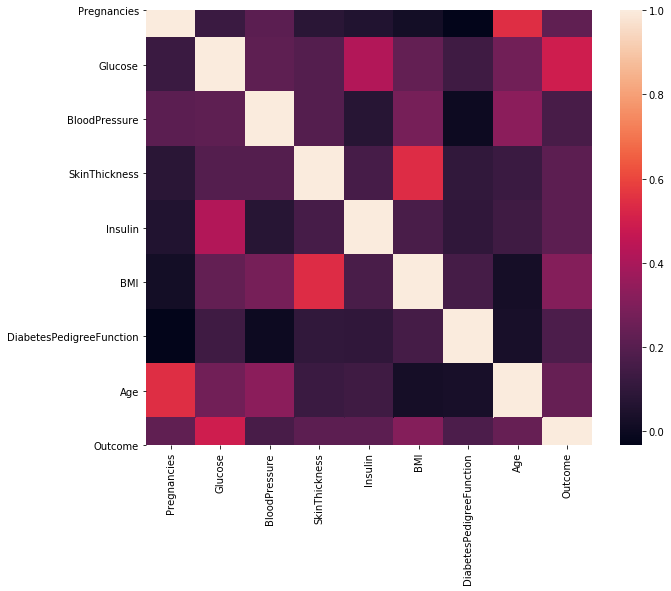

In [48]:
# Visualize correlation using heat map

plt.figure(figsize =(10, 8))
sns.heatmap(df.corr())

## Project Task: Week 3
## Data Modeling:

### 1. Devise strategies for model building. It is important to decide the right validation framework. Express your thought process.

* The strategy for model building is to have the dataset preprocessed and ready for modeling. 
    * This includes setting the predictor variables and the dependent variable.
    * The dataset has to be split into training and test sets. The test set will be used for model validation.
    * This also includes standardizing the data so all the predictor variables are within common range and scale
* KNN classifier with be used.
* Other models like Logistic Regression, SVM and Random Forest classiffiers will be built as well.
* The performance of the different model will be validated using various performance metrics which include accuracy, Confusion Matrix and ROC Curve.
* The model with the best performance will be preferred.

#### Data Preprocessing


In [49]:
# Set the predictor and dependent variables
X = df.drop(columns = ['Outcome'], axis=1)
y = df['Outcome']

In [50]:
# SPlit data into train and test sets by 75% to 25% respectively

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 40)

In [51]:
# Check shape of split data

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(576, 8)
(192, 8)
(576,)
(192,)


In [52]:
# Standardize data using standard Scaler

scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)
X_test_st = scaler.transform(X_test)

# Modeling

# KNN

In [53]:
# Instantiate KNeighborsClassifier class and fit the model

KNN_model = KNeighborsClassifier(n_neighbors = 24)
KNN_model.fit(X_train_st, y_train)

KNeighborsClassifier(n_neighbors=24)

In [54]:
# Make predictions

KNN_predict = KNN_model.predict(X_test_st)

[[110   9]
 [ 37  36]]


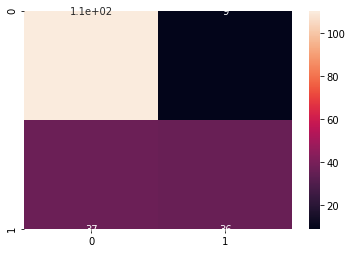

In [55]:
# Visualize Confusion_Matrix
print(confusion_matrix(y_test, KNN_predict))
sns.heatmap(confusion_matrix(y_test, KNN_predict), annot=True)

In [56]:
# Check Accuracy

accuracy_sc = accuracy_score(y_test, KNN_predict)
print(accuracy_sc)
print(f"Accuracy Score: {round(accuracy_sc, 2) * 100}%")

0.7604166666666666
Accuracy Score: 76.0%


In [57]:
# Classification Report
print(classification_report(y_test, KNN_predict))

              precision    recall  f1-score   support

           0       0.75      0.92      0.83       119
           1       0.80      0.49      0.61        73

    accuracy                           0.76       192
   macro avg       0.77      0.71      0.72       192
weighted avg       0.77      0.76      0.74       192




 ROC Curve


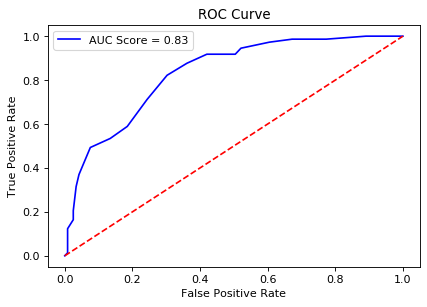

In [58]:
# Area Under Curve


print("\n","ROC Curve")
KNN_probability = KNN_model.predict_proba(X_test_st)
KNN_probability_1=KNN_probability[:,1]
fpr,tpr,thresh = metrics.roc_curve(y_test,KNN_probability_1)
roc_auc_knn = metrics.auc(fpr,tpr)
plt.figure(dpi=80)
plt.title("ROC Curve")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.plot(fpr,tpr,'b',label='AUC Score = %0.2f'%roc_auc_knn)
plt.plot(fpr,fpr,'r--',color='red')
plt.legend()

### 2. Apply an appropriate classification algorithm to build a model. Compare various models with the results from KNN algorithm.

# Logistic Regression

In [59]:
# Instantiate LogisticRegression class and fit the model

Log_model = LogisticRegression()
Log_model.fit(X_train_st, y_train)

LogisticRegression()

[[107  12]
 [ 35  38]]


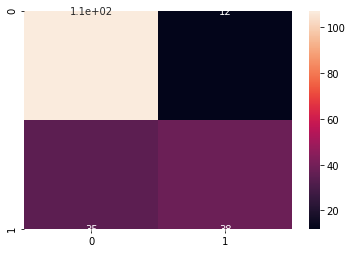

In [60]:
# Make predictions

Log_predict = Log_model.predict(X_test_st)

# Visualize Confusion_Matrix
print(confusion_matrix(y_test, Log_predict))
sns.heatmap(confusion_matrix(y_test, Log_predict), annot=True)

In [61]:
# Check Accuracy

accuracy_sc = accuracy_score(y_test, Log_predict)
print(accuracy_sc)
print(f"Accuracy Score: {round(accuracy_sc, 2) * 100}%")

0.7552083333333334
Accuracy Score: 76.0%


In [62]:
# Classification Report
print(classification_report(y_test, Log_predict))

              precision    recall  f1-score   support

           0       0.75      0.90      0.82       119
           1       0.76      0.52      0.62        73

    accuracy                           0.76       192
   macro avg       0.76      0.71      0.72       192
weighted avg       0.76      0.76      0.74       192




 ROC Curve


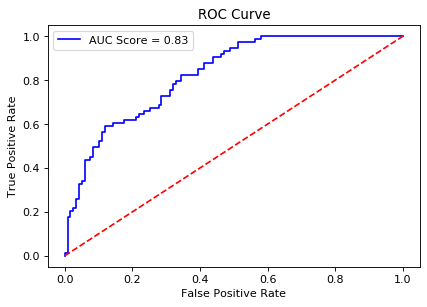

In [63]:
# Area Under Curve


print("\n","ROC Curve")
Log_probability = Log_model.predict_proba(X_test_st)
Log_probability_1=Log_probability[:,1]
fpr,tpr,thresh = metrics.roc_curve(y_test,Log_probability_1)
roc_auc_logistic = metrics.auc(fpr,tpr)
plt.figure(dpi=80)
plt.title("ROC Curve")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.plot(fpr,tpr,'b',label='AUC Score = %0.2f'%roc_auc_logistic)
plt.plot(fpr,fpr,'r--',color='red')
plt.legend()

# Random Forest

In [64]:
# Instantiate KNeighborsClassifier class and fit the model

RF_model = RandomForestClassifier(n_estimators=550)
RF_model.fit(X_train_st, y_train)

RandomForestClassifier(n_estimators=550)

In [65]:
# Make predictions

RF_predict = RF_model.predict(X_test_st)

[[101  18]
 [ 30  43]]


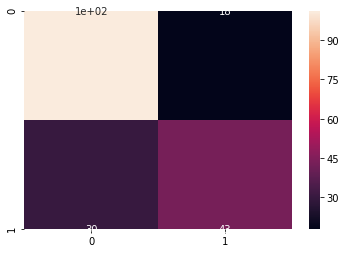

In [66]:
# Visualize Confusion_Matrix
print(confusion_matrix(y_test, RF_predict))
sns.heatmap(confusion_matrix(y_test, RF_predict), annot=True)

In [67]:
# Check Accuracy

accuracy_sc = accuracy_score(y_test, RF_predict)
print(accuracy_sc)
print(f"Accuracy Score: {round(accuracy_sc, 2) * 100}%")

0.75
Accuracy Score: 75.0%


In [68]:
# Classification Report
print(classification_report(y_test, RF_predict))

              precision    recall  f1-score   support

           0       0.77      0.85      0.81       119
           1       0.70      0.59      0.64        73

    accuracy                           0.75       192
   macro avg       0.74      0.72      0.72       192
weighted avg       0.75      0.75      0.74       192




 ROC Curve


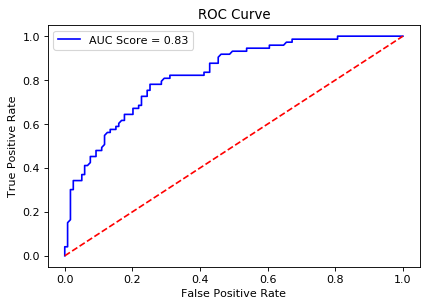

In [69]:
# Area Under Curve


print("\n","ROC Curve")
RF_probability = RF_model.predict_proba(X_test_st)
RF_probability_1=RF_probability[:,1]
fpr,tpr,thresh = metrics.roc_curve(y_test,RF_probability_1)
roc_auc_Random_Forest = metrics.auc(fpr,tpr)
plt.figure(dpi=80)
plt.title("ROC Curve")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.plot(fpr,tpr,'b',label='AUC Score = %0.2f'%roc_auc_Random_Forest)
plt.plot(fpr,fpr,'r--',color='red')
plt.legend()

# Support Vector Machine

In [70]:
# Instantiate KNeighborsClassifier class and fit the model

SVM_model = SVC(kernel='linear', probability=True, random_state=0, C=0.01) 
SVM_model.fit(X_train_st, y_train)

SVC(C=0.01, kernel='linear', probability=True, random_state=0)

In [71]:
# Make predictions

SVM_predict = SVM_model.predict(X_test_st)

[[110   9]
 [ 38  35]]


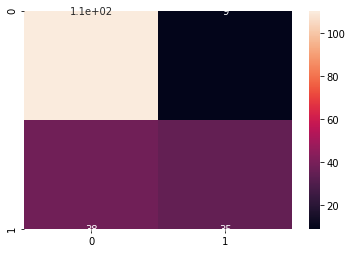

In [72]:
# Visualize Confusion_Matrix
print(confusion_matrix(y_test, SVM_predict))
sns.heatmap(confusion_matrix(y_test, SVM_predict), annot=True)

In [73]:
# Check Accuracy

accuracy_sc = accuracy_score(y_test, SVM_predict)
print(accuracy_sc)
print(f"Accuracy Score: {round(accuracy_sc, 2)}%")

0.7552083333333334
Accuracy Score: 0.76%


In [74]:
# Classification Report
print(classification_report(y_test, SVM_predict))

              precision    recall  f1-score   support

           0       0.74      0.92      0.82       119
           1       0.80      0.48      0.60        73

    accuracy                           0.76       192
   macro avg       0.77      0.70      0.71       192
weighted avg       0.76      0.76      0.74       192




 ROC Curve


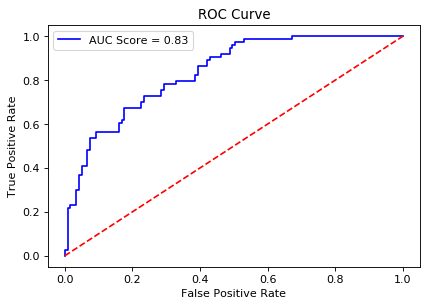

In [75]:
# Area Under Curve


print("\n","ROC Curve")
SVM_probability = SVM_model.predict_proba(X_test_st)
SVM_probability_1 = SVM_probability[:,1]
fpr,tpr,thresh = metrics.roc_curve(y_test,SVM_probability_1)
roc_auc_SVM = metrics.auc(fpr,tpr)
plt.figure(dpi=80)
plt.title("ROC Curve")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.plot(fpr,tpr,'b',label='AUC Score = %0.2f'%roc_auc_SVM)
plt.plot(fpr,fpr,'r--',color='red')
plt.legend()

## Summary of Models and Performance

* KNN
    * Accuracy Score: 76.04%
    * AUC Score: 83%

* Log Reg
    * Accuracy Score: 75.52%
    * AUC Score: 83%

* RF
    * Accuracy Score: 76.04%
    * AUC Score: 82%

* SVM
    * Accuracy Score: 75.52%
    * AUC Score: 83%

* The different models were built using a few tuned parameters to optimize performance.
* KNN and Random Forest had the highest accuracy score of 76% compared to the other two models.
* KNN has a higher AUC score of 83% compare to Random Forest.



* Sensitivity, also termed as recall, is a measure of the proportion of actual positive cases which got predicted as positive or true positive. It can can be called True Positive Rate,TPR.

* Specificity is the proportion of actual negatives which got predicted as the negative or true negative. 
* TPR and FPR always sum up to 1.

* The ROC curve shows the trade-off between sensitivity (or TPR) and specificity (1 – FPR). Classifiers that give curves closer to the top-left corner indicate a better performance. The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

## Feature Importances

In [93]:
# Using Correlation Method

df.corr()[['Outcome']].sort_values(by='Outcome', ascending=False)

,Outcome
Outcome,1.000000
Glucose,0.492928
BMI,0.312249
Age,0.238356
Pregnancies,0.221898
SkinThickness,0.215290
Insulin,0.214411
DiabetesPedigreeFunction,0.173844
BloodPressure,0.163875


In [76]:
# Rank columns by feature importance Using Random Forest feature_importances_ METHOD

importances = RF_model.feature_importances_

# Sort the feature importance in descending order

sorted_indices = np.argsort(importances)[::-1]

In [78]:
# Top columns by feature importance

X_train.columns[sorted_indices]

Index(['Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Pregnancies',
       'BloodPressure', 'Insulin', 'SkinThickness'],
      dtype='object')

In [100]:
X_train_st.shape

(576, 8)

In [79]:
# Map features to feature importances --- 

for feature, importance in zip(X_train.columns[sorted_indices], importances[sorted_indices]):
    print(f'{feature}: {round(importance,4)}')

Glucose: 0.2438
BMI: 0.1544
DiabetesPedigreeFunction: 0.1309
Age: 0.1281
Pregnancies: 0.0987
BloodPressure: 0.0852
Insulin: 0.0813
SkinThickness: 0.0777


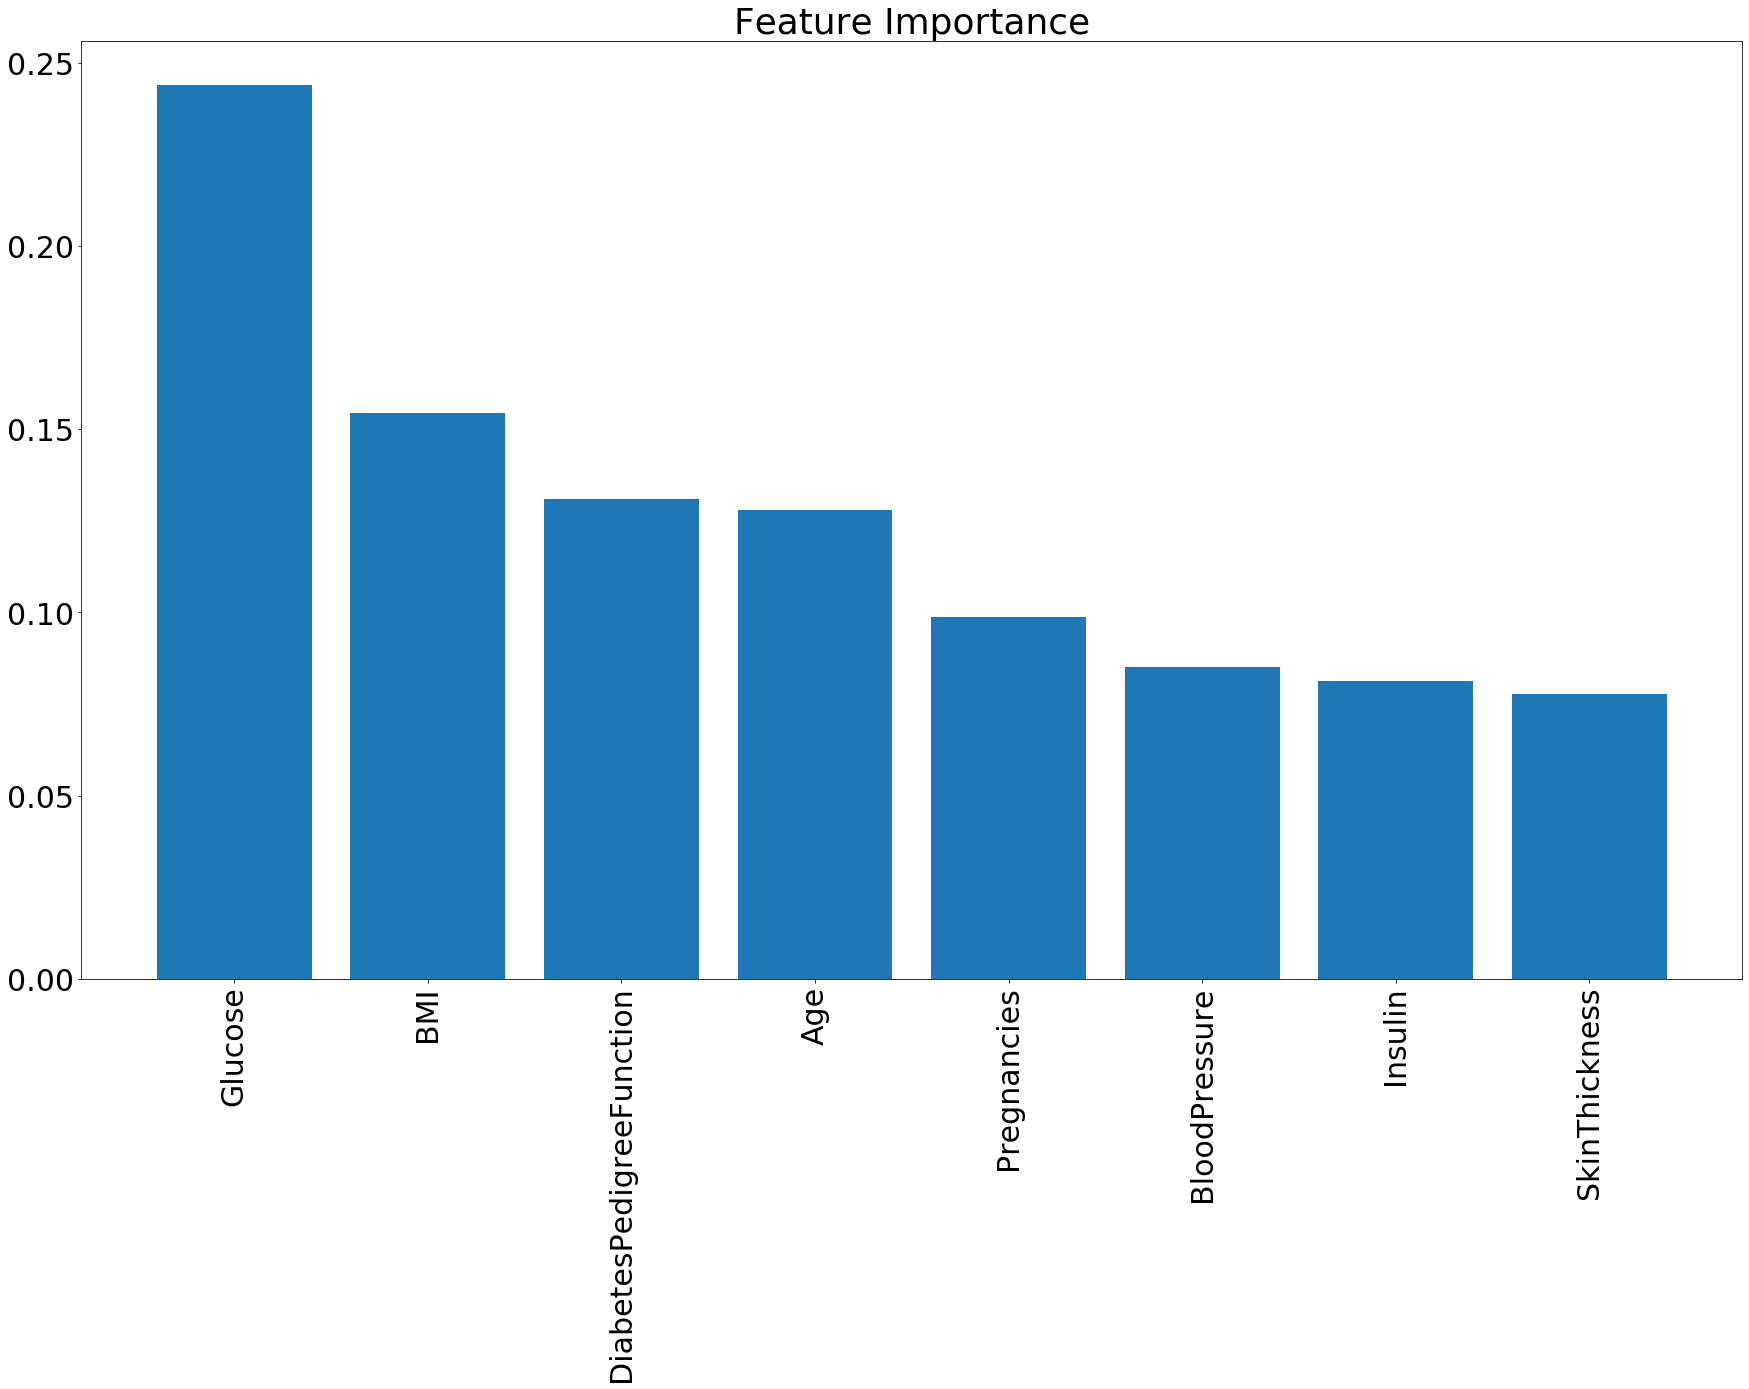

In [146]:
# Visualize Feature Importance

plt.figure(figsize = (25,20))
plt.rc('font', size=30) #controls default text size
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

# Build a KNN Classifier For Deployment Using Top 5 Features

In [142]:
# Save preprocessed data

df.to_csv("preprocessed_data.csv", index=False)

In [105]:
# Get top 5 features/columns

topFeatures = ['Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Pregnancies']

In [119]:
# Set the predictor and Dependent variables

X_trainT5 = X_train[topFeatures]

X_trainT5

,Glucose,BMI,DiabetesPedigreeFunction,Age,Pregnancies
563,99.0,26.9,0.497,32,6
739,102.0,39.5,0.293,42,1
554,84.0,36.9,0.471,28,1
720,83.0,29.3,0.317,34,4
652,123.0,34.1,0.269,28,5
...,...,...,...,...,...
440,189.0,34.3,0.435,41,0
165,104.0,29.9,0.722,41,6
7,115.0,35.3,0.134,29,10
219,112.0,37.8,0.261,41,5


In [121]:
# Standardize data using standard Scaler

scaler = StandardScaler()
X_train_ST5 = scaler.fit_transform(X_trainT5)

# Transform input test data for prediction
# X_test_st = scaler.transform(X_test)

In [122]:
X_train_ST5.shape

(576, 5)

In [123]:
# Instantiate KNeighborsClassifier class and fit the model

KNN_model = KNeighborsClassifier(n_neighbors = 24)
KNN_model.fit(X_train_ST5, y_train)

RandomForestClassifier(n_estimators=550)

In [126]:
# Save Model as pickle file

pickle.dump(KNN_model, open('model.pkl', 'wb'))

# Project Task: Week 4
# Data Reporting

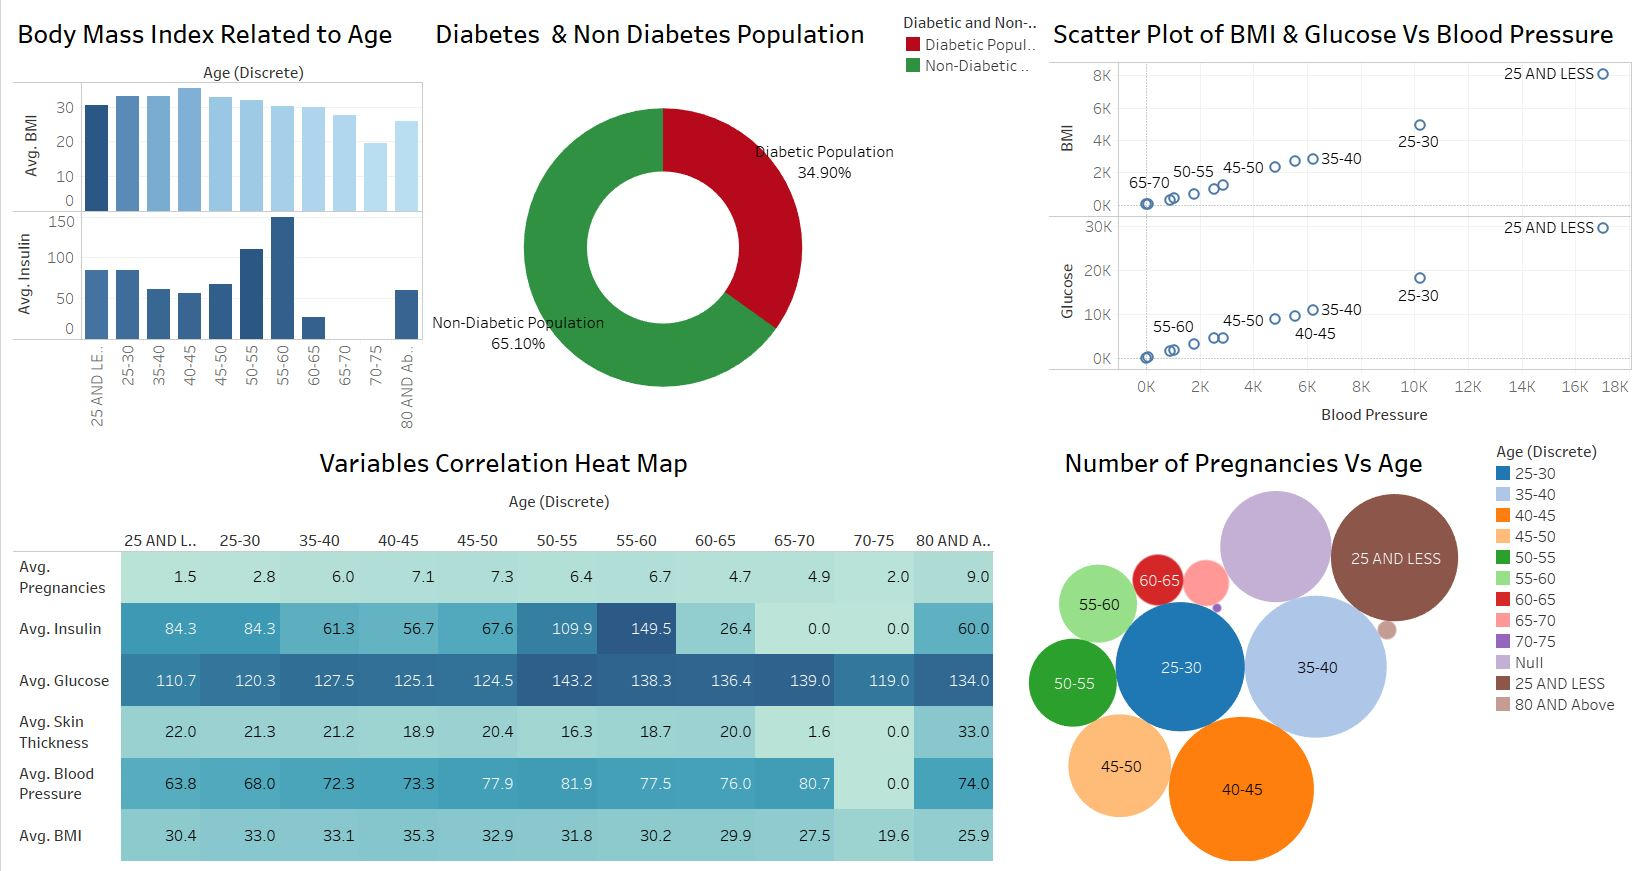